In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from generate_simulation import *
import vclamp_evaluator_HMMtoHH as vcl_ev
import general_plotter as plotter
from generate_simulation import *
import generalized_genSim_shorten_time_HMM as ggsdHMM
import generalized_genSim_shorten_time as ggsd


#from deap import tools
evaluator = vcl_ev.Vclamp_evaluator_HMM('./csv_files/params_na12mut8st_mod_med.csv', 'Basis', 'na12mut8st', 'na16', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp'])
cp_file = './cp.pkl'
channel_name = 'na12mut8st'

##RBS you now need to check in the evaluator that you call peak_amp and TTP with the right ranges: [13,36?]

--No graphics will be displayed.


{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.794499511835696, 'ssi_slope': 7.0938319189628105, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206, -3.2027341340615103], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039, 5.17500000000004]}


In [2]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]

In [3]:
opt_data = pickle.load( open( cp_file, "rb" ) )

In [4]:
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])


In [5]:
print(log)


gen	nevals	avg    	std    	min    	max        
1  	500   	483651 	862862 	211.326	2.10469e+06
2  	500   	458275 	847051 	119.114	2.10469e+06
3  	500   	319320 	737424 	85.2649	2.0454e+06 
4  	500   	236164 	656743 	44.1307	4.13787e+06
5  	500   	113650 	464744 	44.1307	2.09913e+06
6  	500   	50257.4	312648 	21.456 	2.10075e+06
7  	500   	11224.6	143777 	20.038 	2.04088e+06
8  	500   	15095.6	169892 	20.038 	2.03915e+06
9  	500   	12747.8	157453 	14.9187	2.04268e+06
10 	500   	2480.08	64450.8	14.9187	2.03941e+06


In [6]:
def scale(val, src):
    """
    scale val in the 0,1 range when given lb and ub
    """
    return ((val - src[0]) / (src[1]-src[0])) 

In [7]:
csv_file = './csv_files/params_na12mut8st_mod_med.csv'
import eval_helper_na12mut as ehn

def get_place_in_range(opt_ps,csv_file,print_flg = False):
    p_names = []
    p_fact = []
    param_list = ehn.read_params_range(csv_file)
    for ind,p_name in enumerate(param_list.keys()):
        tmp = param_list[p_name]
        lb = tmp[1]
        ub = tmp[2]
        fact = scale(opt_ps[ind],[lb,ub])
        p_names.append(p_name)
        p_fact.append(fact)
        if print_flg:
            print(f'{p_name} - lb:{lb} ub:{ub} p:{fact}')
    return p_names,p_fact
    

In [8]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))
print("[inact_err, act_err]: " + str(evaluator.evaluate_with_lists(best_hof)))
#print("Best invs list: " + str(best_indvs))

Best params: [598.023416761797, 0.3673277243826001, 0.7244063774148075, 0.38508399345136857, 381.5729521877838, 0.0459338718316996, 1.5544496680850424, 0.12401308050293643, 295.0809931378783, 0.1589862015560198, 2.91777897028543, 0.036491526997159233, 10.851915227087865, 1.439429562298527, 0.19863398593452591, 1.3189406477029197, 73.6682941747116, 0.006181035390974871, -17.959844497008277, -16.68323849017667, 11933.906624735726, 4.955281077989737, 0.8763305588089747]
gv_slope: 4.358809974473426
v_half_act: -23.57072782648002
ssi_slope: 4.791941468679744
v_half_inact: -55.65551667209332
[1.4305263287878205, 3.3272657430389145, 0.7413505502581037, 5.298699645104373, 1.5562383840005576, 2.500625000000071, 0.06397227676725882]
[inact_err, act_err]: (1.4305263287878205, 3.3272657430389145, 0.7413505502581037, 5.298699645104373, 1.5562383840005576, 2.500625000000071, 0.06397227676725882)


In [9]:
pnames,pfactors = get_place_in_range(p,csv_file)

a1_0 - lb:9.17 ub:1000.0 p:0.7023884303616513
a1_1 - lb:0.0 ub:10.0 p:0.887629147850625
b1_0 - lb:0.0 ub:10.0 p:0.36157776408347686
b1_1 - lb:0.0177 ub:0.4424 p:0.9423382485086176
a2_0 - lb:3.9617 ub:400.0 p:0.6420223343307204
a2_1 - lb:0.0 ub:0.1109 p:0.3893153416231575
b2_0 - lb:0.113 ub:10.0 p:0.7440349977169175
b2_1 - lb:0.0122 ub:0.3054 p:0.9797549273107324
a3_0 - lb:0.0 ub:359.0595 p:0.5321283974315382
a3_1 - lb:0.0132 ub:0.3297 p:0.8827875790396563
b3_0 - lb:0.1506 ub:10.0 p:0.08168749629724942
b3_1 - lb:0.0 ub:0.1824 p:0.02871320977735651
bh_0 - lb:0.0 ub:14.1507 p:0.6589517298151514
bh_1 - lb:0.0578 ub:1.445 p:0.5234101186855548
bh_2 - lb:0.0139 ub:0.348 p:0.18460034404937076
ah_0 - lb:0.1152 ub:10.0 p:0.41110881372686997
ah_1 - lb:0.1 ub:815.0 p:0.7230297648532572
ah_2 - lb:0.0054 ub:0.134 p:0.6209676646352753
vShift - lb:-30.0 ub:30.0 p:0.09348304807063587
vShift_inact - lb:-30.0 ub:30.0 p:0.7658856915126805
maxrate - lb:1600.0 ub:40000.0 p:0.2391444458300223
ahfactor - lb:0

[Text(0, 0, 'a1_0'),
 Text(0, 1, 'a1_1'),
 Text(0, 2, 'b1_0'),
 Text(0, 3, 'b1_1'),
 Text(0, 4, 'a2_0'),
 Text(0, 5, 'a2_1'),
 Text(0, 6, 'b2_0'),
 Text(0, 7, 'b2_1'),
 Text(0, 8, 'a3_0'),
 Text(0, 9, 'a3_1'),
 Text(0, 10, 'b3_0'),
 Text(0, 11, 'b3_1'),
 Text(0, 12, 'bh_0'),
 Text(0, 13, 'bh_1'),
 Text(0, 14, 'bh_2'),
 Text(0, 15, 'ah_0'),
 Text(0, 16, 'ah_1'),
 Text(0, 17, 'ah_2'),
 Text(0, 18, 'vShift'),
 Text(0, 19, 'vShift_inact'),
 Text(0, 20, 'maxrate'),
 Text(0, 21, 'ahfactor'),
 Text(0, 22, 'bhfactor')]

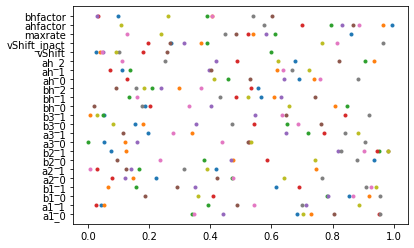

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
yaxis = range(len(pnames))
for p in hof[-10:-2]:
    pnames,pfactors = get_place_in_range(p,csv_file)
    ax.plot(pfactors,yaxis,'.')
pnames,pfactors = get_place_in_range(hof[-1],csv_file,True)
ax.plot(pfactors,yaxis,'.')
ax.set_yticks(yaxis)
ax.set_yticklabels(pnames)


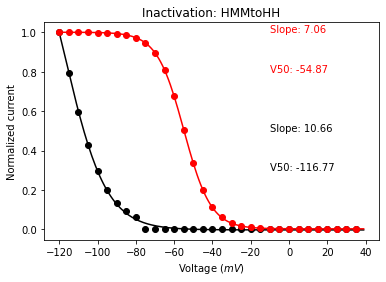

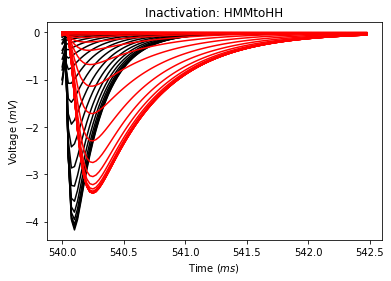

In [11]:
plotter.plot_inact(None, 'na12mut8st', False,p,'na16',True,"./Plots_Folder/jinan_testInact.pdf", "HMMtoHH")

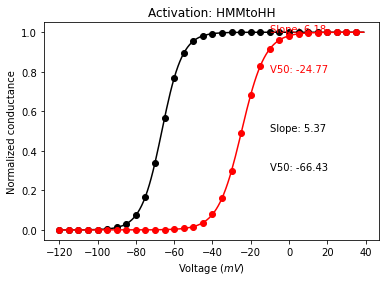

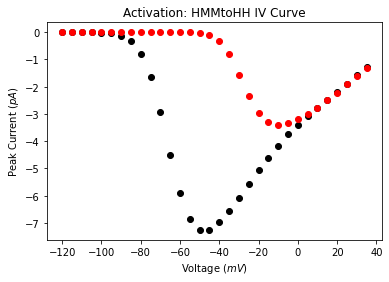

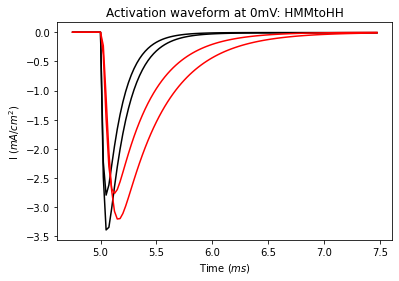

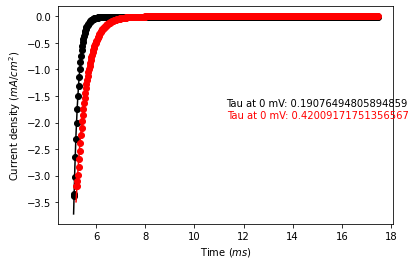

In [12]:
plotter.plot_act(None, 'na12mut8st', False,p,'na16',True,"./Plots_Folder/jinan_test.pdf", "HMMtoHH")

In [13]:
import eval_helper_na12mut8st as ehn8
import eval_helper_na12mut as ehn
import curve_fitting as cf
act_obj = ggsdHMM.Activation(channel_name='na16')

# Test HH Target data

In [14]:
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)

In [15]:
is_HMM = False 
wild_data = {}
# Create genSim objects
act_obj = ggsd.Activation(channel_name='na16')
tau0 = ehn.find_tau0(act_obj)
act_obj = ggsd.Activation(channel_name='na16')
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
peak_amp = ehn.find_peak_amp(act_obj,[14,33])
time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
inact_obj = ggsd.Inactivation(channel_name='na16')
#recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HH)

ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
#y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj)
# gv_slope, v_half_act, top, bottom = (1, 1, 1, 1)
# ssi_slope, v_half_inact, top, bottom = (1, 1, 1, 1)
# y0, plateau, percent_fast, k_fast, k_slow = (1, 1, 1, 1, 1)

# Ramp Protocol
# ramp = ggsdHMM.Ramp(channel_name=self.channel_name)
# ramp_area = ramp.areaUnderCurve
# persistent_curr = ramp.persistentCurrent()

wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
#wild_data['tau_fast'] = 1 / k_fast
#wild_data['tau_slow'] = 1 / k_slow
#wild_data['percent_fast'] = percent_fast
# wild_data['udb20'] = 0
wild_data['tau0'] = tau0
# wild_data['ramp'] = ramp_area
# wild_data['persistent'] = persistent_curr

# Some extra objectives added last minute, so this is a bit hard-coded
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)



{'v_half_act': -24.766773949665836, 'gv_slope': 6.182889397919378, 'v_half_ssi': -54.794499511835696, 'ssi_slope': 7.0938319189628105, 'tau0': 0.42009171751356567, 'peak_amp': [-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063, -3.344838674282482, -3.2027341340615103, -2.998401814643222, -2.7660205398094537, -2.482249121696948, -2.2133286760570616, -1.9051071015409131, -1.597164948160441, -1.2957842129686206], 'time_to_peak': [5.950000000000051, 6.075000000000053, 5.800000000000049, 5.6500000000000465, 5.525000000000045, 5.425000000000043, 5.350000000000042, 5.300000000000042, 5.250000000000041, 5.2250000000000405, 5.17500000000004, 5.17500000000004, 5.150000000000039, 5.125000000000039, 5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039]}


# Test HMM

In [16]:
import curve_fitting as cf
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)

In [17]:
print(gv_slope, v_half_act, top, bottom )

6.182889397919378 -24.766773949665836 0.9999999999984814 9.963248240373344e-11


In [18]:
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
           

In [19]:
print(ssi_slope, v_half_inact, top, bottom)

7.0938319189628105 -54.794499511835696 -0.0014459527029041653 1.0009678615777489


In [20]:
import eval_helper as eh
import scoring_functions_relative as sf

objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau0','peak_current','ttp']
act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
inact_obj = ggsdHMM.Inactivation(channel_name='na12mut8st')
# recov_obj = ggsdHMM.RFI(channel_name=self.channel_name_HMM)
recov_obj = None
param_values = best_hof
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=act_obj)
eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)


In [21]:
import curve_fitting as cf
errors = []
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(inact_obj)
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(act_obj)
if 'v_half_act' in objective_names:
    vhalf_act_error = (v_half_act - wild_data['v_half_act'])**2
    errors.append(vhalf_act_error)
if 'gv_slope' in objective_names:
    gv_slope_error = (gv_slope - wild_data['gv_slope'])**2
    errors.append(gv_slope_error)
if 'v_half_ssi' in objective_names:
    v_half_ssi_error = (v_half_inact - wild_data['v_half_ssi'])**2
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objective_names:
    ssi_slope_error = (ssi_slope - wild_data['ssi_slope'])**2
    errors.append(ssi_slope_error)
if 'peak_current' in objective_names:
    peak_amp = ehn.find_peak_amp(act_obj,[14,33])
    peak_amp_errors = np.sum([np.abs(peak_amp[i] - wild_data['peak_amp'][i]) for i in range(len(peak_amp))])
    errors.append(peak_amp_errors)
if 'ttp' in objective_names:
    time_to_peak = ehn.find_time_to_peak(act_obj,[14,33])
    time_to_peak_error = np.sum([np.abs(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])
    errors.append(time_to_peak_error)
if 'tau0' in objective_names:
    act_obj = ggsdHMM.Activation(channel_name='na12mut8st')
    eh.change_params(param_values, scaled=False, is_HMM=True, sim_obj=inact_obj)
    try:
        tau0 = ehn.find_tau0(act_obj)
        tau0_error = (tau0 - wild_data['tau0'])**2
    except e:
        tau0_error = 1000
    errors.append(tau0_error)

print(errors)

[1.4305263287878205, 3.3272657430389145, 0.7413505502581037, 5.298699645104377, 4.024323966923772, 5.075000000000072, 0.06355272896356057]


In [22]:
print(objective_names)
print(f" vhalf_act is: {v_half_act} WT:{wild_data['v_half_act']} error: {errors[0]}")
print(f" gv_slope is: {gv_slope} WT:{wild_data['gv_slope']} error: {errors[1]}")
print(f" v_half_ssi is: {v_half_inact} WT:{wild_data['v_half_ssi']} error: {errors[2]}")
print(f" ssi_slope is: {ssi_slope} WT:{wild_data['ssi_slope']} error: {errors[3]}")
print(f" peak_current is: {peak_amp} WT:{wild_data['peak_amp']} error: {errors[4]}")
print(f" ttp is: {time_to_peak} WT:{wild_data['time_to_peak']} error: {errors[5]}")
print(f" tau0 is: {tau0} WT:{wild_data['tau0']} error: {errors[6]}")


['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'peak_current', 'ttp']
 vhalf_act is: -23.57072782648002 WT:-24.766773949665836 error: 1.4305263287878205
 gv_slope is: 4.358809974473426 WT:6.182889397919378 error: 3.3272657430389145
 v_half_ssi is: -55.65551667209332 WT:-54.794499511835696 error: 0.7413505502581037
 ssi_slope is: 4.791941468679744 WT:7.0938319189628105 error: 5.298699645104377
 peak_current is: [-2.103669722683815e-06, -6.659992325201632e-05, -0.002379884366223798, -0.0874956703755383, -0.8735899026900443, -2.0948197015457555, -2.6742848580359864, -3.3603250994884, -3.415409577678237, -3.2667587989967104, -3.04992245995938, -2.8039557029174786, -2.5430104221579835, -2.2734264308506233, -1.9984423222808154, -1.7198719598464558, -1.4388155237913174, -1.1559885763067357] WT:[-0.0156116142392469, -0.08689641452307355, -0.31279869152835266, -0.81355296468319, -1.5702849387827609, -2.358331402478808, -2.9551794094406874, -3.2879612751395504, -3.398903176286063,

In [23]:
np.sum([(time_to_peak[i] - wild_data['time_to_peak'][i]) for i in range(len(peak_amp))])


-5.075000000000072

In [24]:
print(act_obj.ipeak_vec)

[-1.645390900656572]


In [25]:
cf.calc_act_obj(act_obj)

(1000, 1000, 1000, 1000)

In [26]:
print(act_obj.ipeak_vec[12])

-0.7966920252790897


In [27]:
i12 = act_obj.all_is[12]
print(i12[np.argmin(i12)])

-1.1369589223338465


In [28]:
print(act_obj.t_vec[np.argmin(i12)])

5.20000000000004


In [29]:
print(len(evaluator.wild_data['time_to_peak']))
print(evaluator.wild_data['time_to_peak'][14:33])

19
[5.125000000000039, 5.125000000000039, 5.100000000000039, 5.100000000000039, 5.17500000000004]


In [30]:
print(best_hof)

[598.023416761797, 0.3673277243826001, 0.7244063774148075, 0.38508399345136857, 381.5729521877838, 0.0459338718316996, 1.5544496680850424, 0.12401308050293643, 295.0809931378783, 0.1589862015560198, 2.91777897028543, 0.036491526997159233, 10.851915227087865, 1.439429562298527, 0.19863398593452591, 1.3189406477029197, 73.6682941747116, 0.006181035390974871, -17.959844497008277, -16.68323849017667, 11933.906624735726, 4.955281077989737, 0.8763305588089747]
